<a href="https://colab.research.google.com/github/phionex2/Dog-vs-Cat-using-CNN/blob/main/cat_vs_dog(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:09<00:00, 155MB/s]
100% 1.06G/1.06G [00:09<00:00, 117MB/s]


In [9]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
#Generators-For making Batches sice data is so big
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#Normalize
def process(image,label):
  image = tf.cast(image/255 ,tf.float32)
  return image,label

trian_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# CNN MODEL

In [44]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

#FULLY_CONNECTED LAYERS
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 103ms/step - loss: 3.9437 - accuracy: 0.5096 - val_loss: 0.7794 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.7244 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.7480 - accuracy: 0.4988 - val_loss: 8.8005 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.7880 - accuracy: 0.4974 - val_loss: 0.7113 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.6932 - accuracy: 0.4913 - val_loss: 0.7175 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6982 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.7148 - accuracy: 0.4875 - val_loss: 0.6932 - val_ac

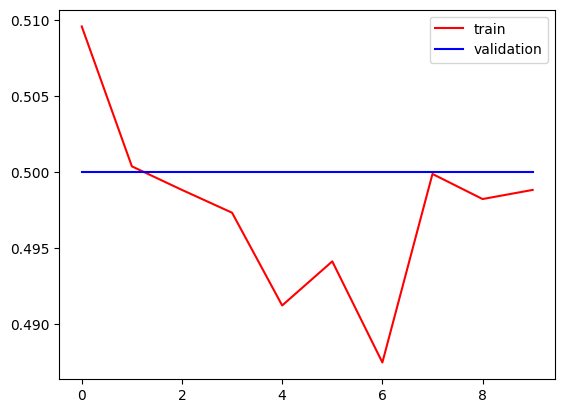

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


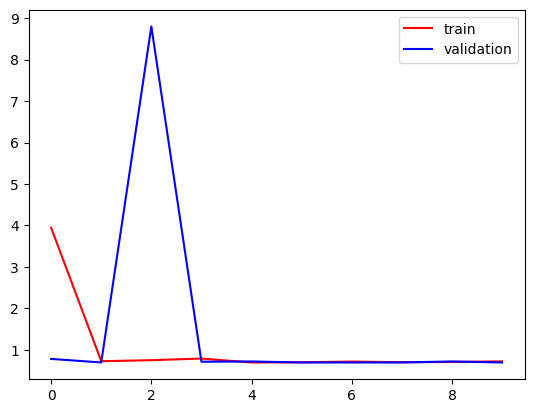

In [49]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
import cv2


In [74]:
test_img = cv2.imread('/content/CAT.jpg')

In [75]:
print(type(test_img))

<class 'numpy.ndarray'>


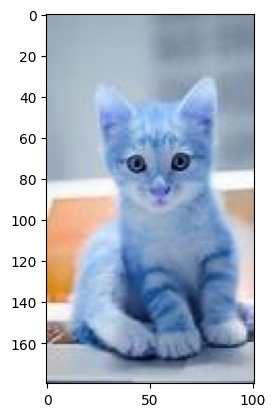

In [76]:
plt.imshow(test_img)

In [77]:
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape(1,256,256,3)

In [78]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.49944082]], dtype=float32)